<a href="https://colab.research.google.com/github/kimmie-78/Water-Quality/blob/gh-pages/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installer

In [1]:
!pip install missingno

#Libraries

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from collections import Counter

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from google.colab import files

#Import the dataset

In [6]:
upload = files.upload()

Saving water_potability.csv to water_potability.csv


#Loading in the data as a csv file


In [7]:
dataset = pd.read_csv('water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Getting basic information about the dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Define colors used as colorcodes

In [10]:
blue = '#51C4D3' # To mark drinkable water
green = '#74C365' # To mark undrinkable water
red = '#CD6155' # For further markings
orange = '#DC7633' # For further markings

# Plot the colors as a palplot

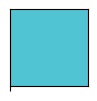

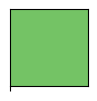

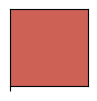

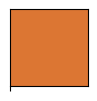

In [11]:
sns.palplot([blue])
sns.palplot([green])
sns.palplot([red])
sns.palplot([orange])

#Exploratory Data Analysis

# Count amount of each value in the Potability column

In [12]:
dataset['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


# Clear matplotlib and set style

In [13]:
plt.clf()
plt.style.use('ggplot')

<Figure size 640x480 with 0 Axes>

# Create subplot and pie chart

([<matplotlib.patches.Wedge at 0x79113696c6d0>,
 [Text(-0.3722543665175176, 1.0350974285586076, 'Not drinkable'),
  Text(0.3722543665175174, -1.0350974285586076, 'Drinkable')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61.0%'),
  Text(0.2030478362822822, -0.5645985973956041, '39.0%')])

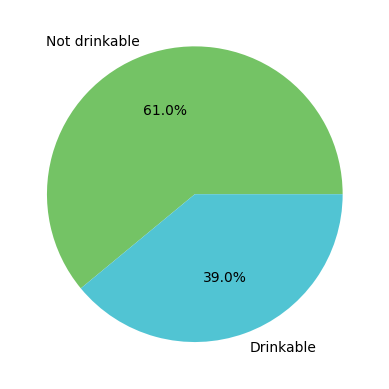

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(dataset['Potability'].value_counts(), colors=[green, blue], labels=['Not drinkable', 'Drinkable'], autopct='%1.1f%%', startangle=0, rotatelabels=False)

#Draw circle

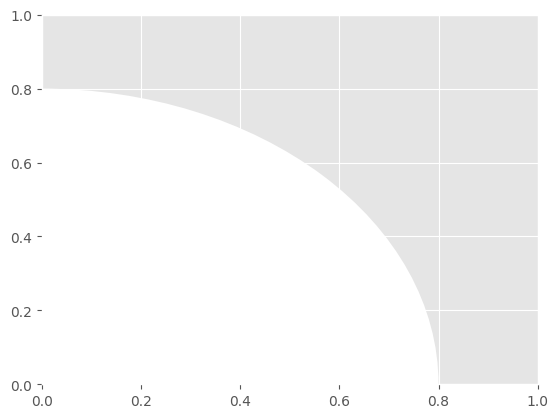

In [15]:
centre_circle = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle

In [16]:
ax1.axis('equal')

(-1.0999985042819105,
 1.099999928775329,
 -1.0999934243307448,
 1.0999988771859561)

# Set tighten layout and show plot

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Define a list of features to be plotted

In [18]:
feature = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Drop Potability column

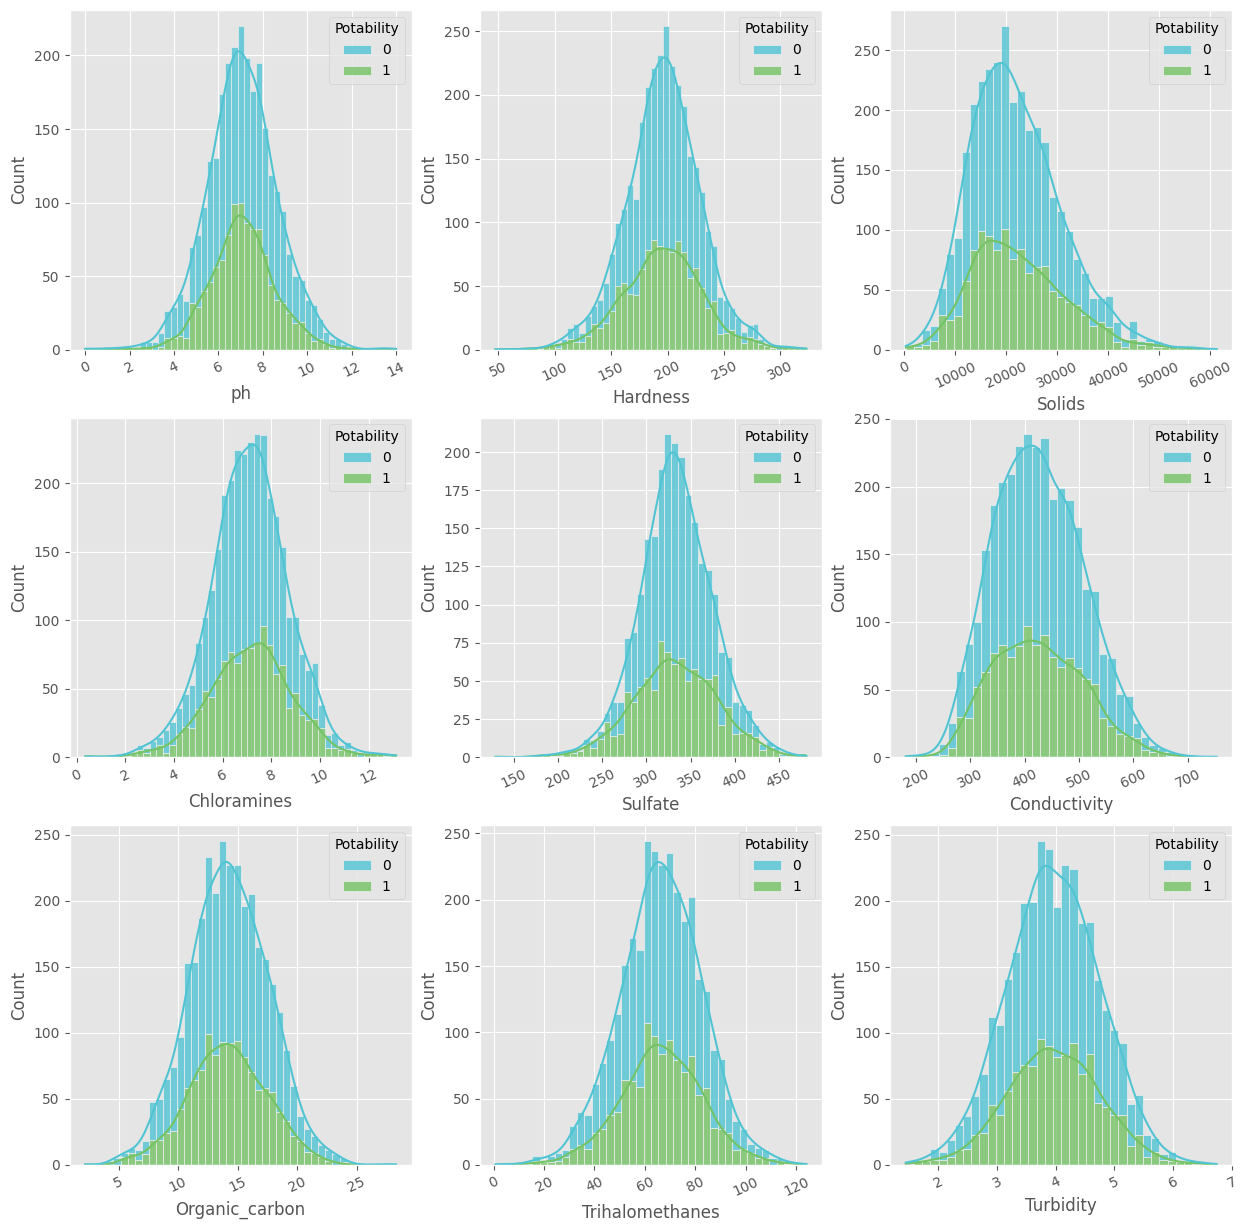

In [19]:
plotter_dataset = dataset.drop('Potability', axis=1)

plt.figure(figsize = (15, 15))

# Iterate through the feature list and plot a histlpot
for i in enumerate(feature):
    plt.subplot(3, 3,i[0]+1)

    # Histlot plotting the fetures in the dataset
    sns.histplot(
        data = plotter_dataset,
        x = plotter_dataset[i[1]],
        hue = dataset['Potability'],
        palette= [blue, green],
        kde = True,
        multiple='stack',
        alpha=0.8
    )

    # Rotate the xticks for better readability
    plt.xticks(rotation = 25)

#Further filtering of the data

# Define a plotting function

In [20]:
def mask_plotter(column, mask1, mask2, label1, label2, color2, title):
    # Set size and stlye
    plt.figure(figsize=(5, 5))
    plt.style.use('ggplot')

    # Create to histplots
    sns.histplot(data=dataset[mask1], x=column, multiple='stack', color=blue, label=label1) # Save
    sns.histplot(data=dataset[mask2], x=column, multiple='stack', color=color2, label=label2)

    # Add title, legend and show plot
    plt.title(title)
    plt.legend()
    plt.show()

# Create masks to filter ph-values within a specific range

In [21]:
drinkable_ph_mask = (dataset['ph'] > 6.5) & (dataset['ph'] < 9)
undrinkable_ph_mask = (dataset['ph'] < 6.5) | (dataset['ph'] > 9)

# Create masks to filter ph-values within a specific range
soft_mask = (dataset['Hardness'] < 150)
hard_mask = (dataset['Hardness'] > 150)

# Create masks to filter ph-values within a specific range
eu_recommendation = (dataset['Sulfate'] < 250)
who_recommendation = (dataset['Sulfate'] > 250) & (dataset['Sulfate'] < 500)

# Plot ph-values

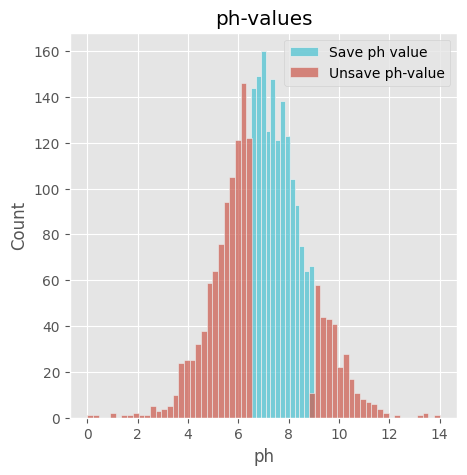

In [22]:
mask_plotter('ph', drinkable_ph_mask, undrinkable_ph_mask, 'Save ph value', 'Unsave ph-value', red, 'ph-values')

# Plot Hardness

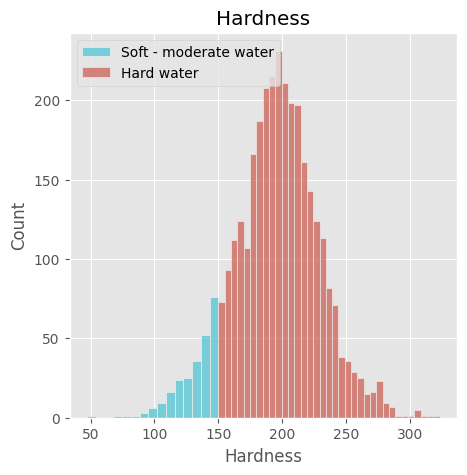

In [23]:
mask_plotter('Hardness', soft_mask, hard_mask, 'Soft - moderate water', 'Hard water', red, 'Hardness')

# Plot Sulfate

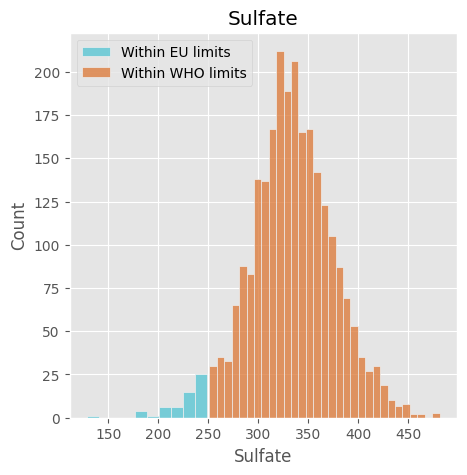

In [24]:
mask_plotter('Sulfate', eu_recommendation, who_recommendation, 'Within EU limits', 'Within WHO limits', orange, 'Sulfate')

#Data preparation

##Dealing with missing data

####The ph, Sulfate and Trihalomethanes columnes contain a lot of missing values. Dropping all of these values would mean that we lose a considerable amount of data. Instead, we will look into replacing missing values with the mean of median.

# Plot out missing values

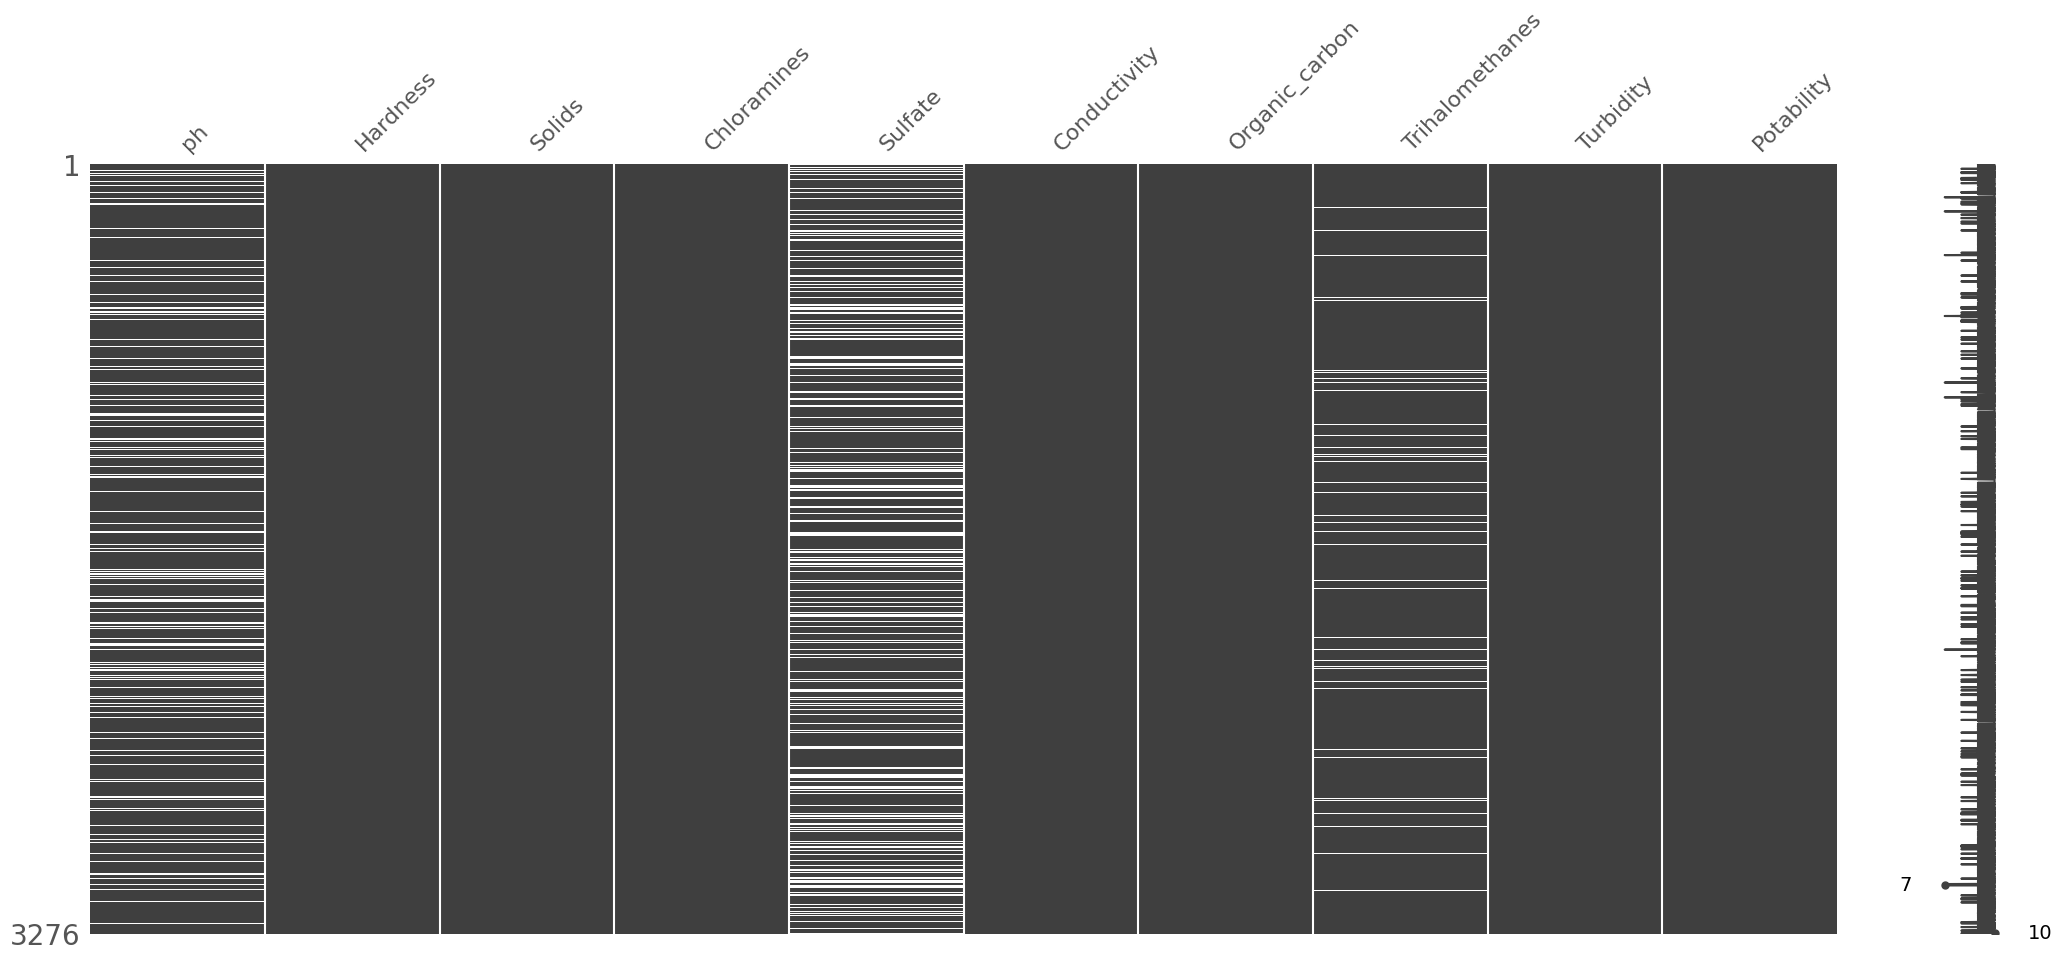

In [25]:
fig = msno.matrix(dataset)

####Median and mean are very similar. Missing values will be replaces by the median value.

# Mean and median

In [26]:
# # Mean and median of ph
print("Mean of ph: " + str(dataset['ph'].mean()))
print("Median of ph: " + str(dataset['ph'].median()))
print('-------------------------------------------')

# Mean and median of Sulfates
print("Mean of Sulfate: " + str(dataset['Sulfate'].mean()))
print("Median of Sulfate: " + str(dataset['Sulfate'].median()))
print('-------------------------------------------')

# Mean and median of Trihalomethanes
print("Mean of Trihalomethanes: " + str(dataset['Trihalomethanes'].mean()))
print("Median of Trihalomethanes: " + str(dataset['Trihalomethanes'].median()))
print('-------------------------------------------')

Mean of ph: 7.080794504276835
Median of ph: 7.036752103833548
-------------------------------------------
Mean of Sulfate: 333.7757766108135
Median of Sulfate: 333.073545745888
-------------------------------------------
Mean of Trihalomethanes: 66.39629294676803
Median of Trihalomethanes: 66.62248509808484
-------------------------------------------


# Replacing nan values with the median

In [27]:
dataset['ph'].fillna(value=dataset['ph'].median(),inplace=True)
dataset['Sulfate'].fillna(value=dataset['Sulfate'].median(),inplace=True)
dataset['Trihalomethanes'].fillna(value=dataset['Trihalomethanes'].median(),inplace=True)

# Checking if there are missing values left

In [28]:
dataset.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


#Checking for correlations

# Set figure size

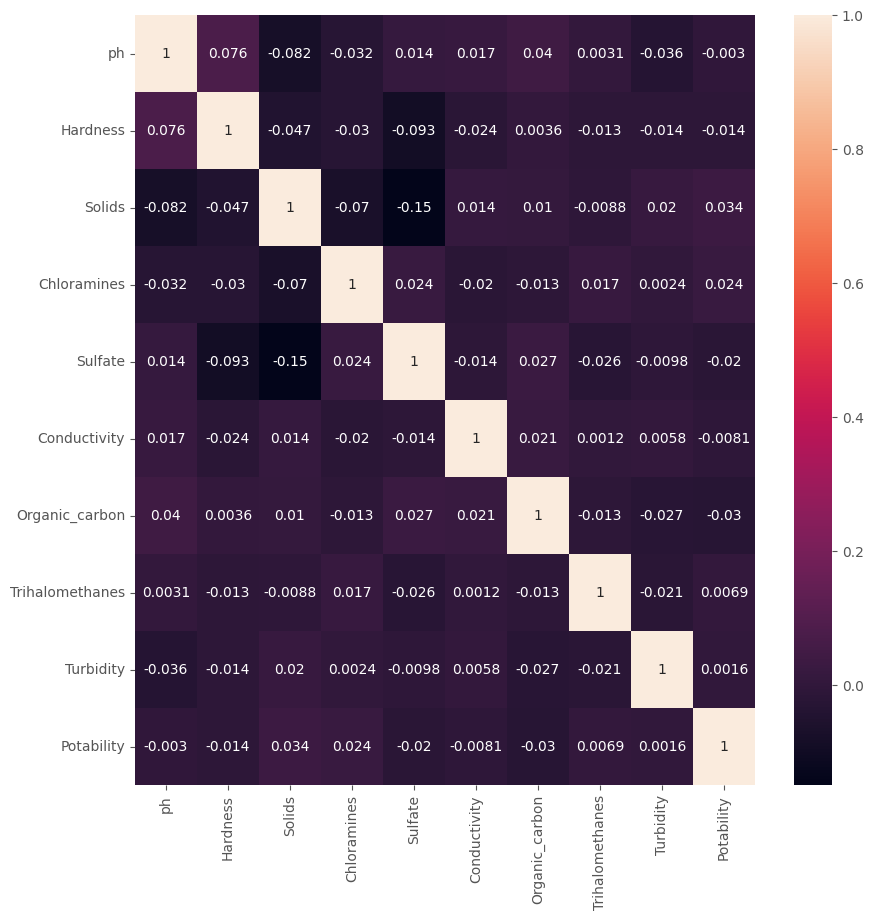

In [29]:
plt.figure(figsize=(10, 10))

# Create heatmap
sns.heatmap(dataset.corr(), annot=True)

# Show plot
plt.show()

# Setting features (X) and targets(y)

In [30]:
X = dataset.drop('Potability', axis=1)
y = dataset['Potability']

#Training and testing dataset

# Split data into training and testing dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the data. Only training data is fitted, testing data is only transformed
# Also, only x values are scaled, because y only containes values 0 and 1, which we don't want to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creatre figure and list containing axes

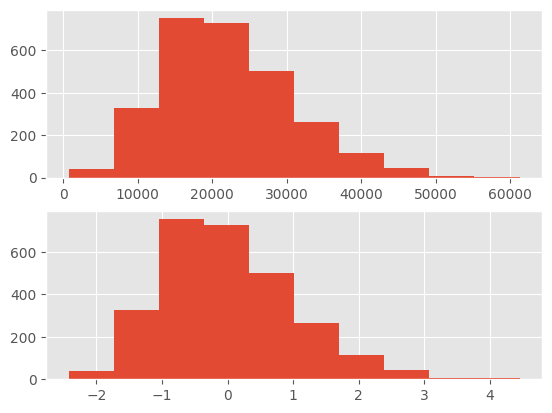

In [32]:
fig, ax = plt.subplots(2, 1)

# Plot histogram of before and after scaling
X_train.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(X_train_scaled[:, 2])
plt.show()

#Building a model

##Randomized, cross validated search

####Time to build a machine learning model. To determine what makes, potable water, five different machine learning algortihms are going to be used. To get (relatively) good results, a cross validated random search is used on every model.

####The random search randomly seelcts parameters from a predefined grid and to find the best results within these parameters. Computing the results of all the possible paramters would be computationally expensive. Doing a random search saves both time and computational power. After all models have gone through a randomized search, the best model will be selected. To get the absolute best results from that model, a grid search is performed, where all possible cominations of parmateres are tested to find out the best parameters.

# Set up all the models that are to be tested

In [33]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

# lr param grid

In [34]:
lr_params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0, 5, 10)}

# Instantiate cross validated logistic regression random search
rs_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_params, cv=5)

# Fit lr to trainig data
rs_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tracebac

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                                        'penalty': ['l1', 'l2']})

# rfc param grid

In [35]:
rfc_params = {
    'n_estimators' : [*range(25, 400, 20)],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated random forest random search
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv=5)

# Fit rfc to trainig data
rs_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [25, 45, 65, 85, 105,
                                                         125, 145, 165, 185,
                                                         205, 225, 245, 265,
                                                         285, 305, 325, 345,
                                                         365, 385]})

# dtc param grid

In [36]:
dtc_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated desicion tree random search
rs_dtc = RandomizedSearchCV(estimator=dtc, param_distributions=dtc_params, cv=5)

# Fit dtc to trainig data
rs_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'splitter': ['best', 'random']})

# xgb param grid

In [37]:
xgb_params = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : np.linspace(0, 1, 10),
    'n_estimators' : [*range(25, 500, 10)]}

# Instantiate cross validated extreme gradient boosting random search
rs_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5)

# Fit xgb to training data
rs_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'loss': ['deviance', 'exponential'],
                                        'n_estimators': [25, 35, 45, 55, 65, 75,
                                                         85, 95, 105, 115, 125,
                                                         135, 145, 155, 165,
                                                         175, 185, 195, 205,
                                                         215, 225, 235, 245,
                                                         255, 265, 275, 285,
                                                         295, 305, 315, ...]})

# knn param grid

In [38]:
knn_params = {
    'n_neighbors' : [*range(1, 11)],
    'weights' : ['uniform', 'distant'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree' 'brute'],
    'leaf_size' : [10, 20, 30, 40]}

# Instantiate cross validated k-nearest neighbor random search
rs_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_params, cv=5)

# Fit knn to training data
rs_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_treebrute'],
                                        'leaf_size': [10, 20, 30, 40],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distant']})

#Selecting the best model

# Set up all models scores as a df

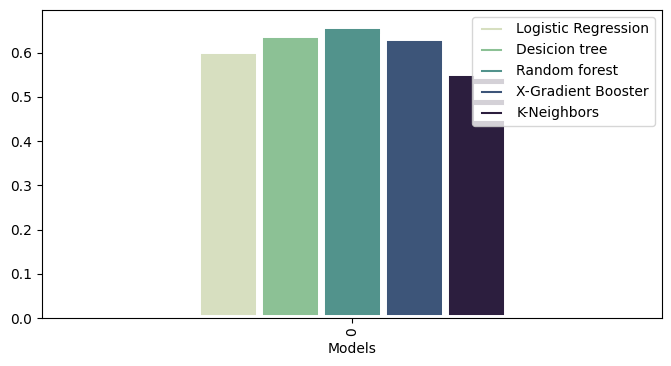

In [39]:
score_df =  pd.DataFrame({'Logistic Regression' :  [rs_lr.best_score_] ,'Desicion tree' : [rs_dtc.best_score_], \
'Random forest' : [rs_rfc.best_score_],'X-Gradient Booster': [rs_xgb.best_score_] ,'K-Neighbors' : [rs_knn.best_score_]})

# Plot bar plot
plt.style.use('default')
color_palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
score_df.plot(kind='bar', edgecolor='white', colormap=color_palette, linewidth=5, figsize=(8, 4), xlabel='Models')

# Show plot
plt.show()

#Further improvement using cross validated grid search

In [ ]:
'''
# rfc param grid
rfc_params = {
    'n_estimators' : [*range(25, 400, 20)],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [*range(1, 5)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated random forest random search
gs_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=5)

# Fit rfc to trainig data
gs_rfc.fit(X_train, y_train)

'''

# Print out feature importance

In [ ]:
#feature_imp = pd.Series(gs_rfc.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
#print(feature_imp)

In [ ]:
#print(gs_rfc.best_estimator_.feature_importances_)

In [ ]:
#print(gs_rfc.best_estimator_)

#The best model

In [40]:
from sklearn.metrics import accuracy_score

# Set up the best classifiert
rfc_v02 = RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=265)

# Train it
rfc_v02.fit(X_train, y_train)

# Predict on unseen data
y_pred = rfc_v02.predict(X_test)

# Get the score of the model
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  65.65040650406505


#Feature importances

# Get feature importance

<Figure size 640x480 with 0 Axes>

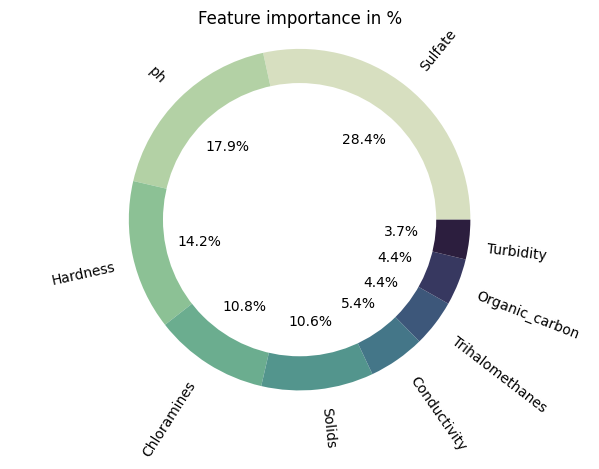

In [41]:
feature_imp = pd.Series(rfc_v02.feature_importances_, index=X.columns).sort_values(ascending=False)

# Clear matplotlib
plt.clf()

# Create subplot and pie chart
fig1, ax1 = plt.subplots()
ax1.pie(feature_imp, colors=sns.cubehelix_palette(start=.5, rot=-.75, n_colors=9), labels=feature_imp.index, autopct='%1.1f%%', startangle=0, rotatelabels=True)

#draw circle
centre_circle = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set tighten layout and show plot
plt.title('Feature importance in %')
plt.tight_layout()
plt.show()